In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import decode_image

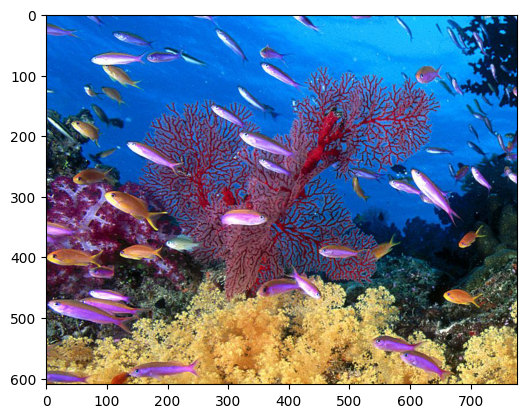

In [3]:
## Visually checking random images from dataset
import random, os

source = 'data'
random_image = random.choice(os.listdir(source))
img = decode_image(str(source + '/' + random_image))
plt.imshow(img.permute(1, 2, 0))


In [4]:
## Simple normalisation
from torchvision.transforms import v2
import torch

torch.manual_seed(1)
img.shape

torch.Size([3, 610, 777])

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.7843, 0.6627, 0.4392],
         [0.0000, 0.0000, 0.0000,  ..., 0.7529, 0.6275, 0.4824],
         [0.0157, 0.0039, 0.0078,  ..., 0.6863, 0.5882, 0.4235],
         ...,
         [0.5569, 0.5569, 0.5059,  ..., 0.6902, 0.7020, 0.7686],
         [0.6118, 0.6353, 0.6431,  ..., 0.7529, 0.6941, 0.7373],
         [0.6235, 0.6314, 0.6431,  ..., 0.7686, 0.6980, 0.8000]],

        [[0.4235, 0.4275, 0.4275,  ..., 0.9333, 0.7922, 0.5686],
         [0.4235, 0.4235, 0.4275,  ..., 0.9020, 0.7569, 0.6118],
         [0.4157, 0.4157, 0.4157,  ..., 0.8471, 0.7608, 0.5961],
         ...,
         [0.4000, 0.4157, 0.3647,  ..., 0.5098, 0.5333, 0.6000],
         [0.4039, 0.4196, 0.4118,  ..., 0.5373, 0.4980, 0.5412],
         [0.4157, 0.4157, 0.4118,  ..., 0.5529, 0.5020, 0.6039]],

        [[0.8902, 0.9059, 0.9176,  ..., 0.9373, 1.0000, 0.9490],
         [0.8902, 0.9020, 0.9176,  ..., 0.9059, 1.0000, 0.9922],
         [0.8471, 0.8431, 0.8588,  ..., 1.0000, 0.9059, 0.

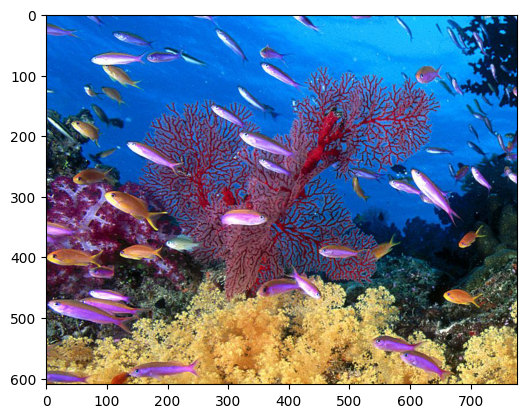

In [5]:
norm_img = img/255
plt.imshow(norm_img.permute(1, 2, 0))
norm_img

In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image

# A simple dataset for a single folder of images
class SingleFolderDataset(Dataset):
    def __init__(self, folder, transform=None):
        self.folder = folder
        self.transform = transform
        self.filenames = sorted(os.listdir(folder))
        
    def __len__(self):
        return len(self.filenames)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.folder, self.filenames[idx])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define a transform that only converts images to tensor (scaling to [0, 1])
simple_transform = transforms.Compose([
    transforms.ToTensor(),
])

stats_folder = 'data-64x64-128x128/high_res'
stats_dataset = SingleFolderDataset(stats_folder, transform=simple_transform)

train_size = 0.8
train_size = int(train_size * len(stats_dataset))
test_size = len(stats_dataset) - train_size
train_dataset, test_dataset = random_split(stats_dataset, [train_size, test_size])


stats_loader = DataLoader(train_dataset, batch_size=10, shuffle=False, num_workers=0)

# Initialize accumulators
mean = torch.zeros(3)
std = torch.zeros(3)
nb_samples = 0

for images in stats_loader:
    # images shape: [B, C, H, W]
    batch_samples = images.size(0)
    nb_samples += batch_samples
    # Reshape to [B, C, H*W]
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)

mean /= nb_samples
std /= nb_samples

print("Computed mean:", mean)
print("Computed std:", std)


Computed mean: tensor([0.5749, 0.5367, 0.4373])
Computed std: tensor([0.1970, 0.1929, 0.2085])
